<a href="https://colab.research.google.com/github/DarioDell/Binary_classification_problem/blob/main/bank_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 💰 **Binary Classification of 💲 Bank Churn 💵 analysis** 💸

## About the dataset

The dataset used below will be 'Dataset_churn.csv', which deals with the classic example of predicting customers who will abandon a company's services. In this case it is about a banking entity, therefore, the objective is to prevent the bank's clients from unsubscribing.<br>
I obtained the dataset from Kaggle.<br>

The dataset is composed of 175000 rows and 25 columns:


*   **Surname**: the number that identifies the client, because personal information cannot be used.
*   **CreditScore**: The customer's credit score at the time of data collection.


*   **Age**: The customer's age, valuable for demographic analysis.
*   **Tenure**: The number of years the customer has been with the bank.


*   **Balance**: The customer's account balance.
*   **NumOfProducts**: The number of products the customer has purchased or subscribed to


*   **HasCrCard**: Indicates whether the customer has a credit card (1) or not (0).
*   **IsActiveMember**: Indicates whether the customer is an active member (1) or not (0).



*   **EstimatedSalary**: The customer's estimated salary.
*   **Exited**: The target variable, indicating whether the customer has churned (1) or not (0).


*   **France**: 1 if it is french
*   **Germany**: 1 if it is German


*   **Spain**: 1 if it is Spanish
*   **Male**: 1 if it is male


*   **Female**: 1 if it is female
*   **Mem__no__Products**: NumOfProducts * IsActiveMember


*    **Cred_Bal_Sal**: (Credit Score * Balance) / EstimatedSalary
*    **Bal_sal**: Balance / EstimatedSalary

*   **Tenure_Age**: Tenure / Age
*   **Age_Tenure_product**: Age * Tenure
















## Load the libraries

In [121]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas.plotting import scatter_matrix

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression

import sklearn.metrics as metrics

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

## Load the dataset

In [122]:
pd.options.display.float_format = '{:,.2f}'.format

In [123]:
df = pd.read_csv('./Dataset_churn.csv', sep=',')
df

,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,...,France,Germany,Spain,Female,Male,Mem__no__Products,Cred_Bal_Sal,Bal_sal,Tenure_Age,Age_Tenure_product
0,2023,668.00,33.00,3.00,0.00,2.00,1,0,"181,449.97",0,...,1,0,0,0,1,0.00,0.00,0.00,0.09,99.00
1,2024,627.00,33.00,1.00,0.00,2.00,1,1,"49,503.50",0,...,1,0,0,0,1,2.00,0.00,0.00,0.03,33.00
2,1236,678.00,40.00,10.00,0.00,2.00,1,0,"184,866.69",0,...,1,0,0,0,1,0.00,0.00,0.00,0.25,400.00
3,1362,581.00,34.00,2.00,"148,882.54",1.00,1,1,"84,560.88",0,...,1,0,0,0,1,1.00,"1,022.94",1.76,0.06,68.00
4,491,716.00,33.00,5.00,0.00,2.00,1,1,"15,068.83",0,...,0,0,1,0,1,2.00,0.00,0.00,0.15,165.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175023,2226,644.00,28.00,7.00,"155,060.41",1.00,1,0,"29,179.52",0,...,1,0,0,0,1,0.00,"3,422.23",5.31,0.25,196.00
175024,2846,800.00,29.00,2.00,0.00,2.00,0,0,"167,773.55",0,...,1,0,0,1,0,0.00,0.00,0.00,0.07,58.00
175025,1999,771.00,39.00,5.00,0.00,2.00,1,0,"96,270.64",0,...,1,0,0,0,1,0.00,0.00,0.00,0.13,195.00
175026,1336,516.00,35.00,10.00,"57,369.61",1.00,1,1,"101,699.77",0,...,1,0,0,0,1,1.00,291.08,0.56,0.29,350.00


## Data pre-processing

In [124]:
# remove the variables I don't need

df = df.drop(['Surname', 'Surname_tfidf_0', 'Surname_tfidf_1', 'Surname_tfidf_2', 'Surname_tfidf_3', 'Surname_tfidf_4' ], axis=1)

In [125]:
# Missings

df.isna().sum()

CreditScore           0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
France                0
Germany               0
Spain                 0
Female                0
Male                  0
Mem__no__Products     0
Cred_Bal_Sal          0
Bal_sal               0
Tenure_Age            0
Age_Tenure_product    0
dtype: int64

In [126]:
print(u'- Number of rows: {}'.format(df.shape[0]))
print(u'- Number of columns: {}'.format(df.shape[1]))
print(u'- Name of columns:{}'.format(list(df.columns)))

- Number of rows: 175028
- Number of columns: 19
- Name of columns:['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'France', 'Germany', 'Spain', 'Female', 'Male', 'Mem__no__Products', 'Cred_Bal_Sal', 'Bal_sal', 'Tenure_Age', 'Age_Tenure_product']


In [127]:
# I check the data types

df.dtypes

CreditScore           float64
Age                   float64
Tenure                float64
Balance               float64
NumOfProducts         float64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
France                  int64
Germany                 int64
Spain                   int64
Female                  int64
Male                    int64
Mem__no__Products     float64
Cred_Bal_Sal          float64
Bal_sal               float64
Tenure_Age            float64
Age_Tenure_product    float64
dtype: object

In [128]:
# I transform those float variables that do not require decimals

col_convert = ['Age','CreditScore', 'Tenure', 'NumOfProducts', 'Mem__no__Products', 'Exited', 'France', 'Germany', 'Spain', 'Female', 'Male']

for col in col_convert:
  df[col] = df[col].astype('int')

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175028 entries, 0 to 175027
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CreditScore         175028 non-null  int64  
 1   Age                 175028 non-null  int64  
 2   Tenure              175028 non-null  int64  
 3   Balance             175028 non-null  float64
 4   NumOfProducts       175028 non-null  int64  
 5   HasCrCard           175028 non-null  int64  
 6   IsActiveMember      175028 non-null  int64  
 7   EstimatedSalary     175028 non-null  float64
 8   Exited              175028 non-null  int64  
 9   France              175028 non-null  int64  
 10  Germany             175028 non-null  int64  
 11  Spain               175028 non-null  int64  
 12  Female              175028 non-null  int64  
 13  Male                175028 non-null  int64  
 14  Mem__no__Products   175028 non-null  int64  
 15  Cred_Bal_Sal        175028 non-nul

In [130]:
# The descriptive statistics of the DataFrame

df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,Female,Male,Mem__no__Products,Cred_Bal_Sal,Bal_sal,Tenure_Age,Age_Tenure_product
count,"175,028.00","175,028.00","175,028.00","175,028.00","175,028.00","175,028.00","175,028.00","175,028.00","175,028.00","175,028.00","175,028.00","175,028.00","175,028.00","175,028.00","175,028.00","175,028.00","175,028.00","175,028.00","175,028.00"
mean,656.11,38.17,5.02,"56,676.77",1.55,0.75,0.50,"111,863.30",0.21,0.57,0.21,0.22,0.44,0.56,0.78,"1,444.36",2.20,0.14,191.35
std,81.15,8.97,2.81,"62,982.42",0.55,0.43,0.50,"50,815.12",0.41,0.50,0.41,0.41,0.50,0.50,0.87,"60,972.38",92.68,0.09,118.75
min,350.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,597.00,32.00,3.00,0.00,1.00,1.00,0.00,"73,225.31",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.07,93.00
50%,659.00,37.00,5.00,0.00,2.00,1.00,0.00,"116,969.73",0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.13,180.00
75%,710.00,42.00,7.00,"120,727.97",2.00,1.00,1.00,"154,767.34",0.00,1.00,0.00,0.00,1.00,1.00,2.00,658.59,1.00,0.20,272.00
max,850.00,92.00,10.00,"250,898.09",4.00,1.00,1.00,"199,992.48",1.00,1.00,1.00,1.00,1.00,1.00,4.00,"8,634,204.11","12,863.80",0.56,880.00


### Division into features X + target Y
The Y variable is set as the target variable, while the X variable is made up of the remaining columns.

In [131]:
X = df.drop('Exited', axis= 1)
Y = df['Exited']

## Visualizations and correlations

### Histograms

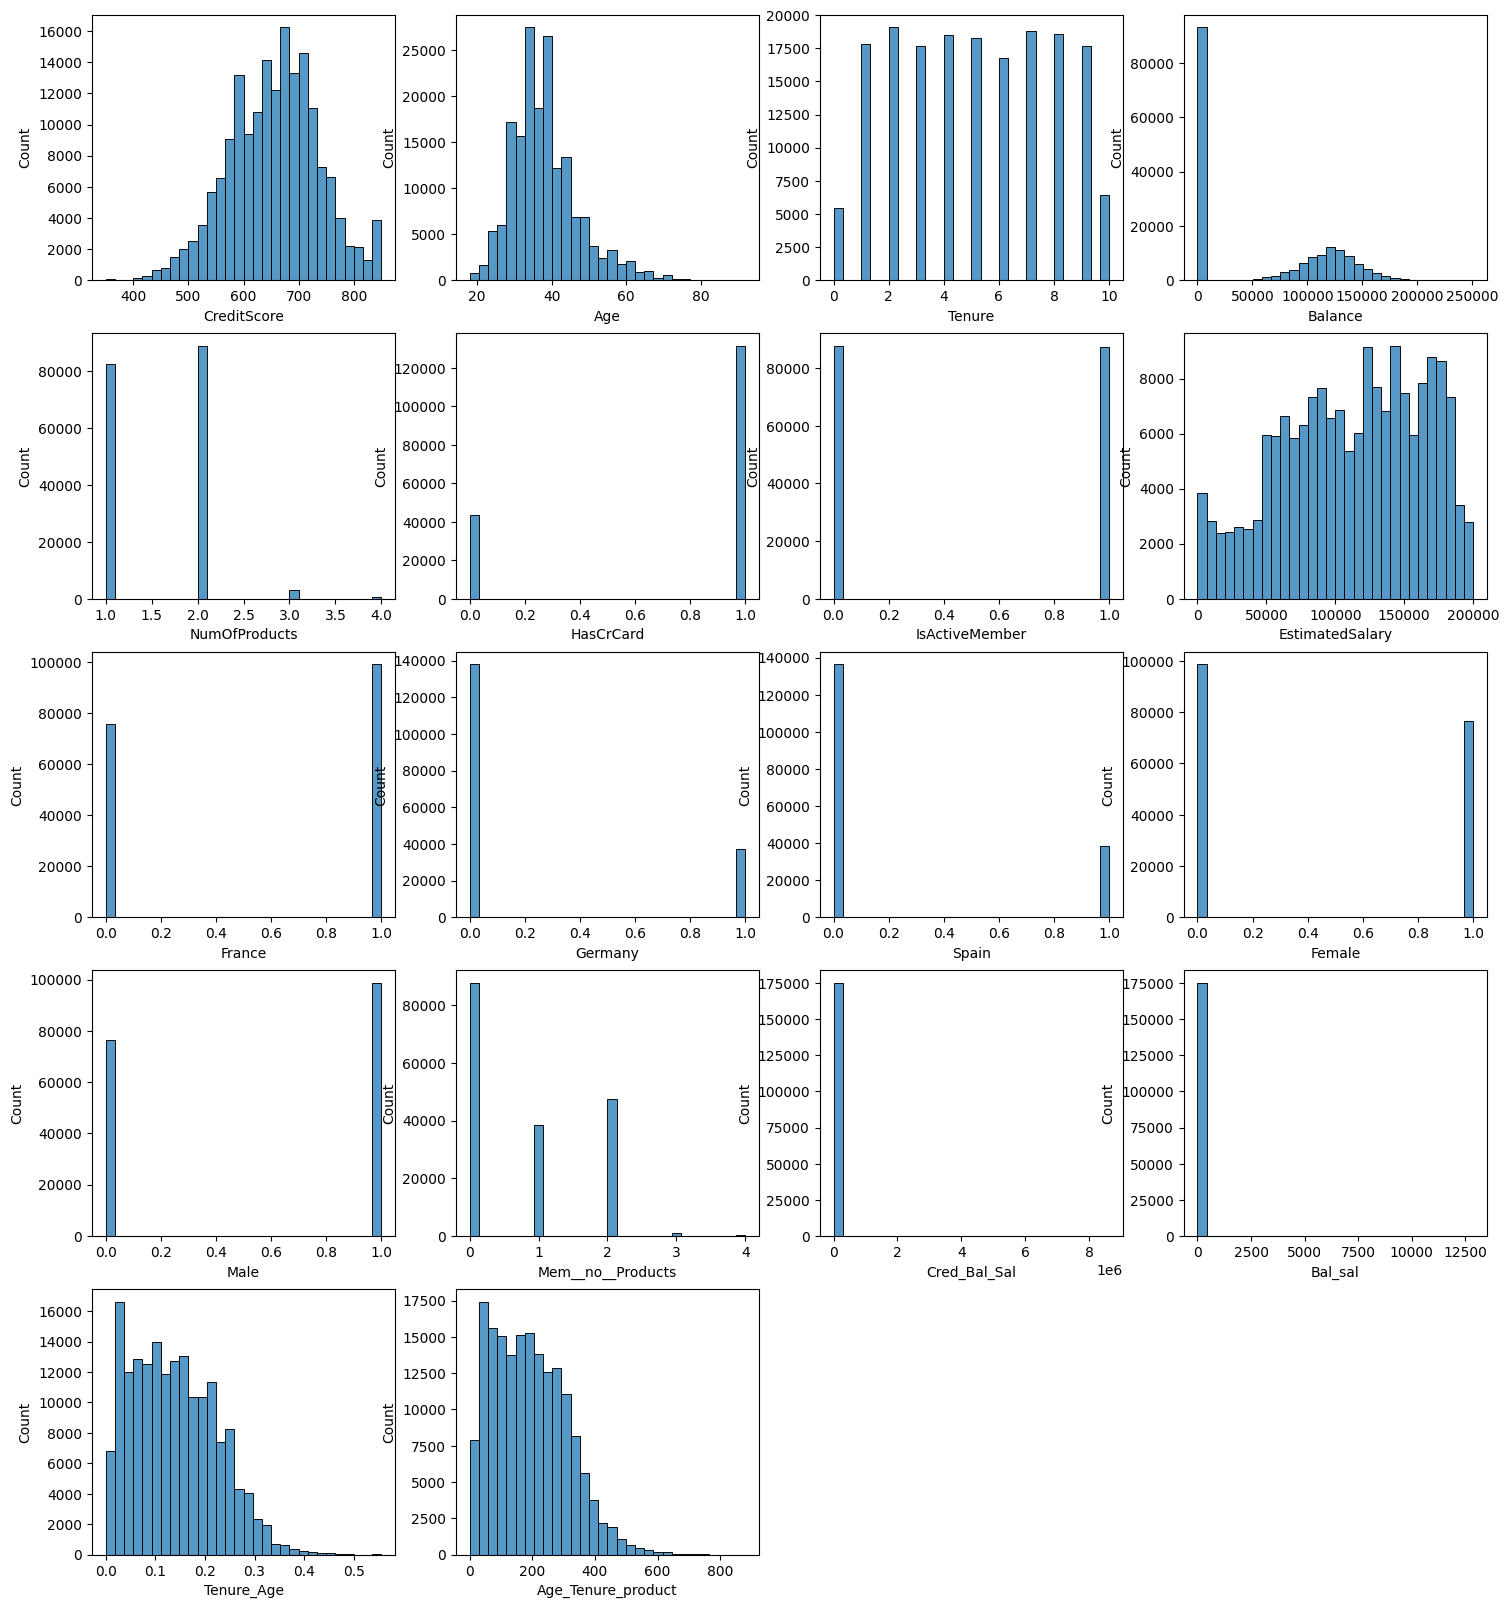

In [132]:
plt.figure(figsize=(18,20))
n = 0
for i,column in enumerate(X.columns):
  n+=1
  plt.subplot(5, 4, n)
  sns.histplot(X[column], bins=30)
plt.show()

Nothing strange is observed, they follow normal forms.

### Variable vs target relationship

In [133]:

def relation_vs_target(X, Y, return_type='axes'):
    fig_tot = len(X.columns)
    fig_row = 4
    fig_size = 4
    num_rows = int(np.ceil(fig_tot / fig_row))
    plt.figure(figsize=(fig_row*fig_size+5, num_rows*fig_size+5))
    c = 0
    for i, col in enumerate(X.columns):
        plt.subplot(num_rows, fig_row, i + 1)  #Select the current subpath
        sns.scatterplot(x=X[col], y=Y)
        plt.title('%s vs %s' % (col, 'target'))
        plt.ylabel('Target')
        plt.xlabel(col)


    plt.tight_layout()
    plt.show()

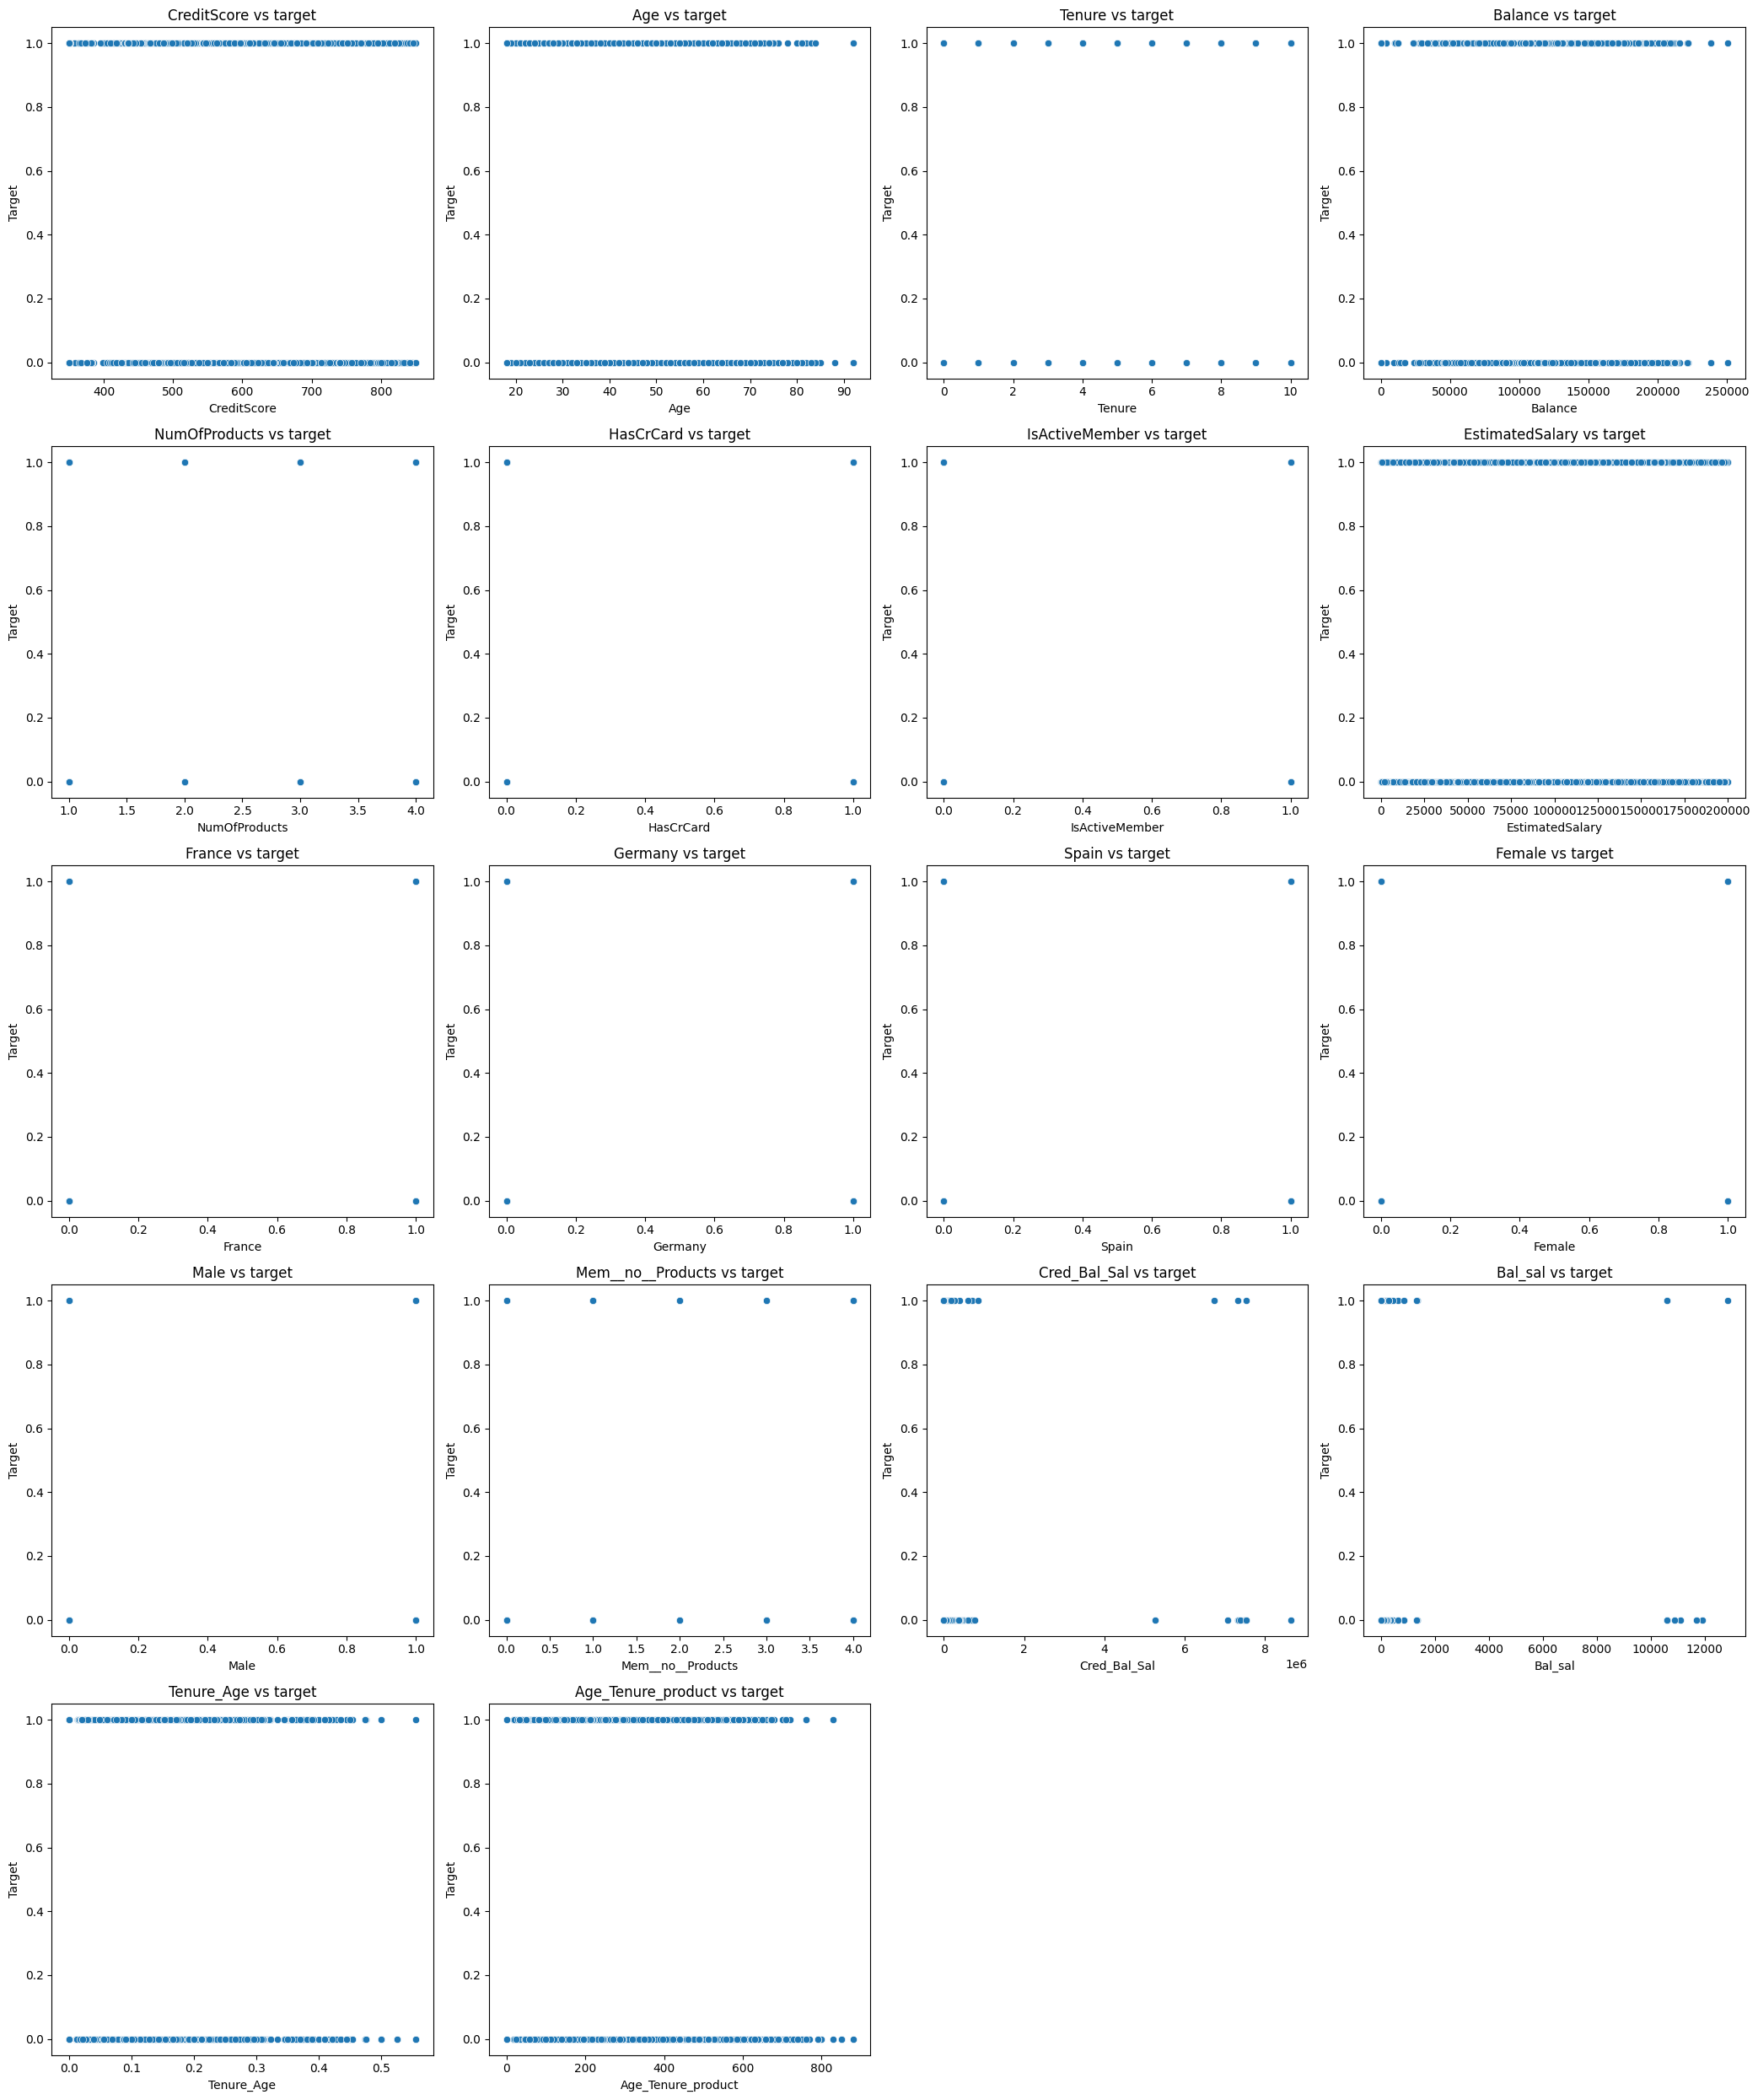

In [134]:
relation_vs_target(X, Y)

**This graph is more important than the previous one because here it is observed which variables discriminate more and which less.<br>
There are no big differences between the targets (0 and 1), rather they move together taking almost the same values**


In [135]:
def represent_hist(x_1, x_0, n_bins=11, title= '', label_1='Class 1',
                   label_0 ='Class 0', density=0):
  bins = n_bins
  plt.hist(x_1, bins, density = density, alpha = 0.5, label = label_1, color = 'blue')
  plt.hist(x_0, bins, density = density, alpha = 0.5, label = label_0, color = 'red')
  plt.title(title)
  plt.legend(loc='best')

def hist_pos_neg (x, y, density=0, nbins= 11, targets=(0,1)):
  fig_tot = len(X.columns)
  fig_row = 4
  fig_size = 4
  num_rows = int(np.ceil(fig_tot / fig_row))
  plt.figure(figsize=(fig_row*fig_size+2, num_rows*fig_size+2))
  target_neg, target_pos = targets
  for i, feat in enumerate(x.columns):
        plt.subplot(num_rows, fig_row, i + 1);  # Selecciona el subtrazado actual
        plt.title('%s' % feat)
        idx_pos = y == target_pos
        idx_neg = y == target_neg
        represent_hist(x[feat][idx_pos].values, x[feat][idx_neg].values, nbins, density = density, title=('%s' % feat))


  plt.tight_layout()  # Ajusta automáticamente la disposición de los subtrazados
  plt.show()

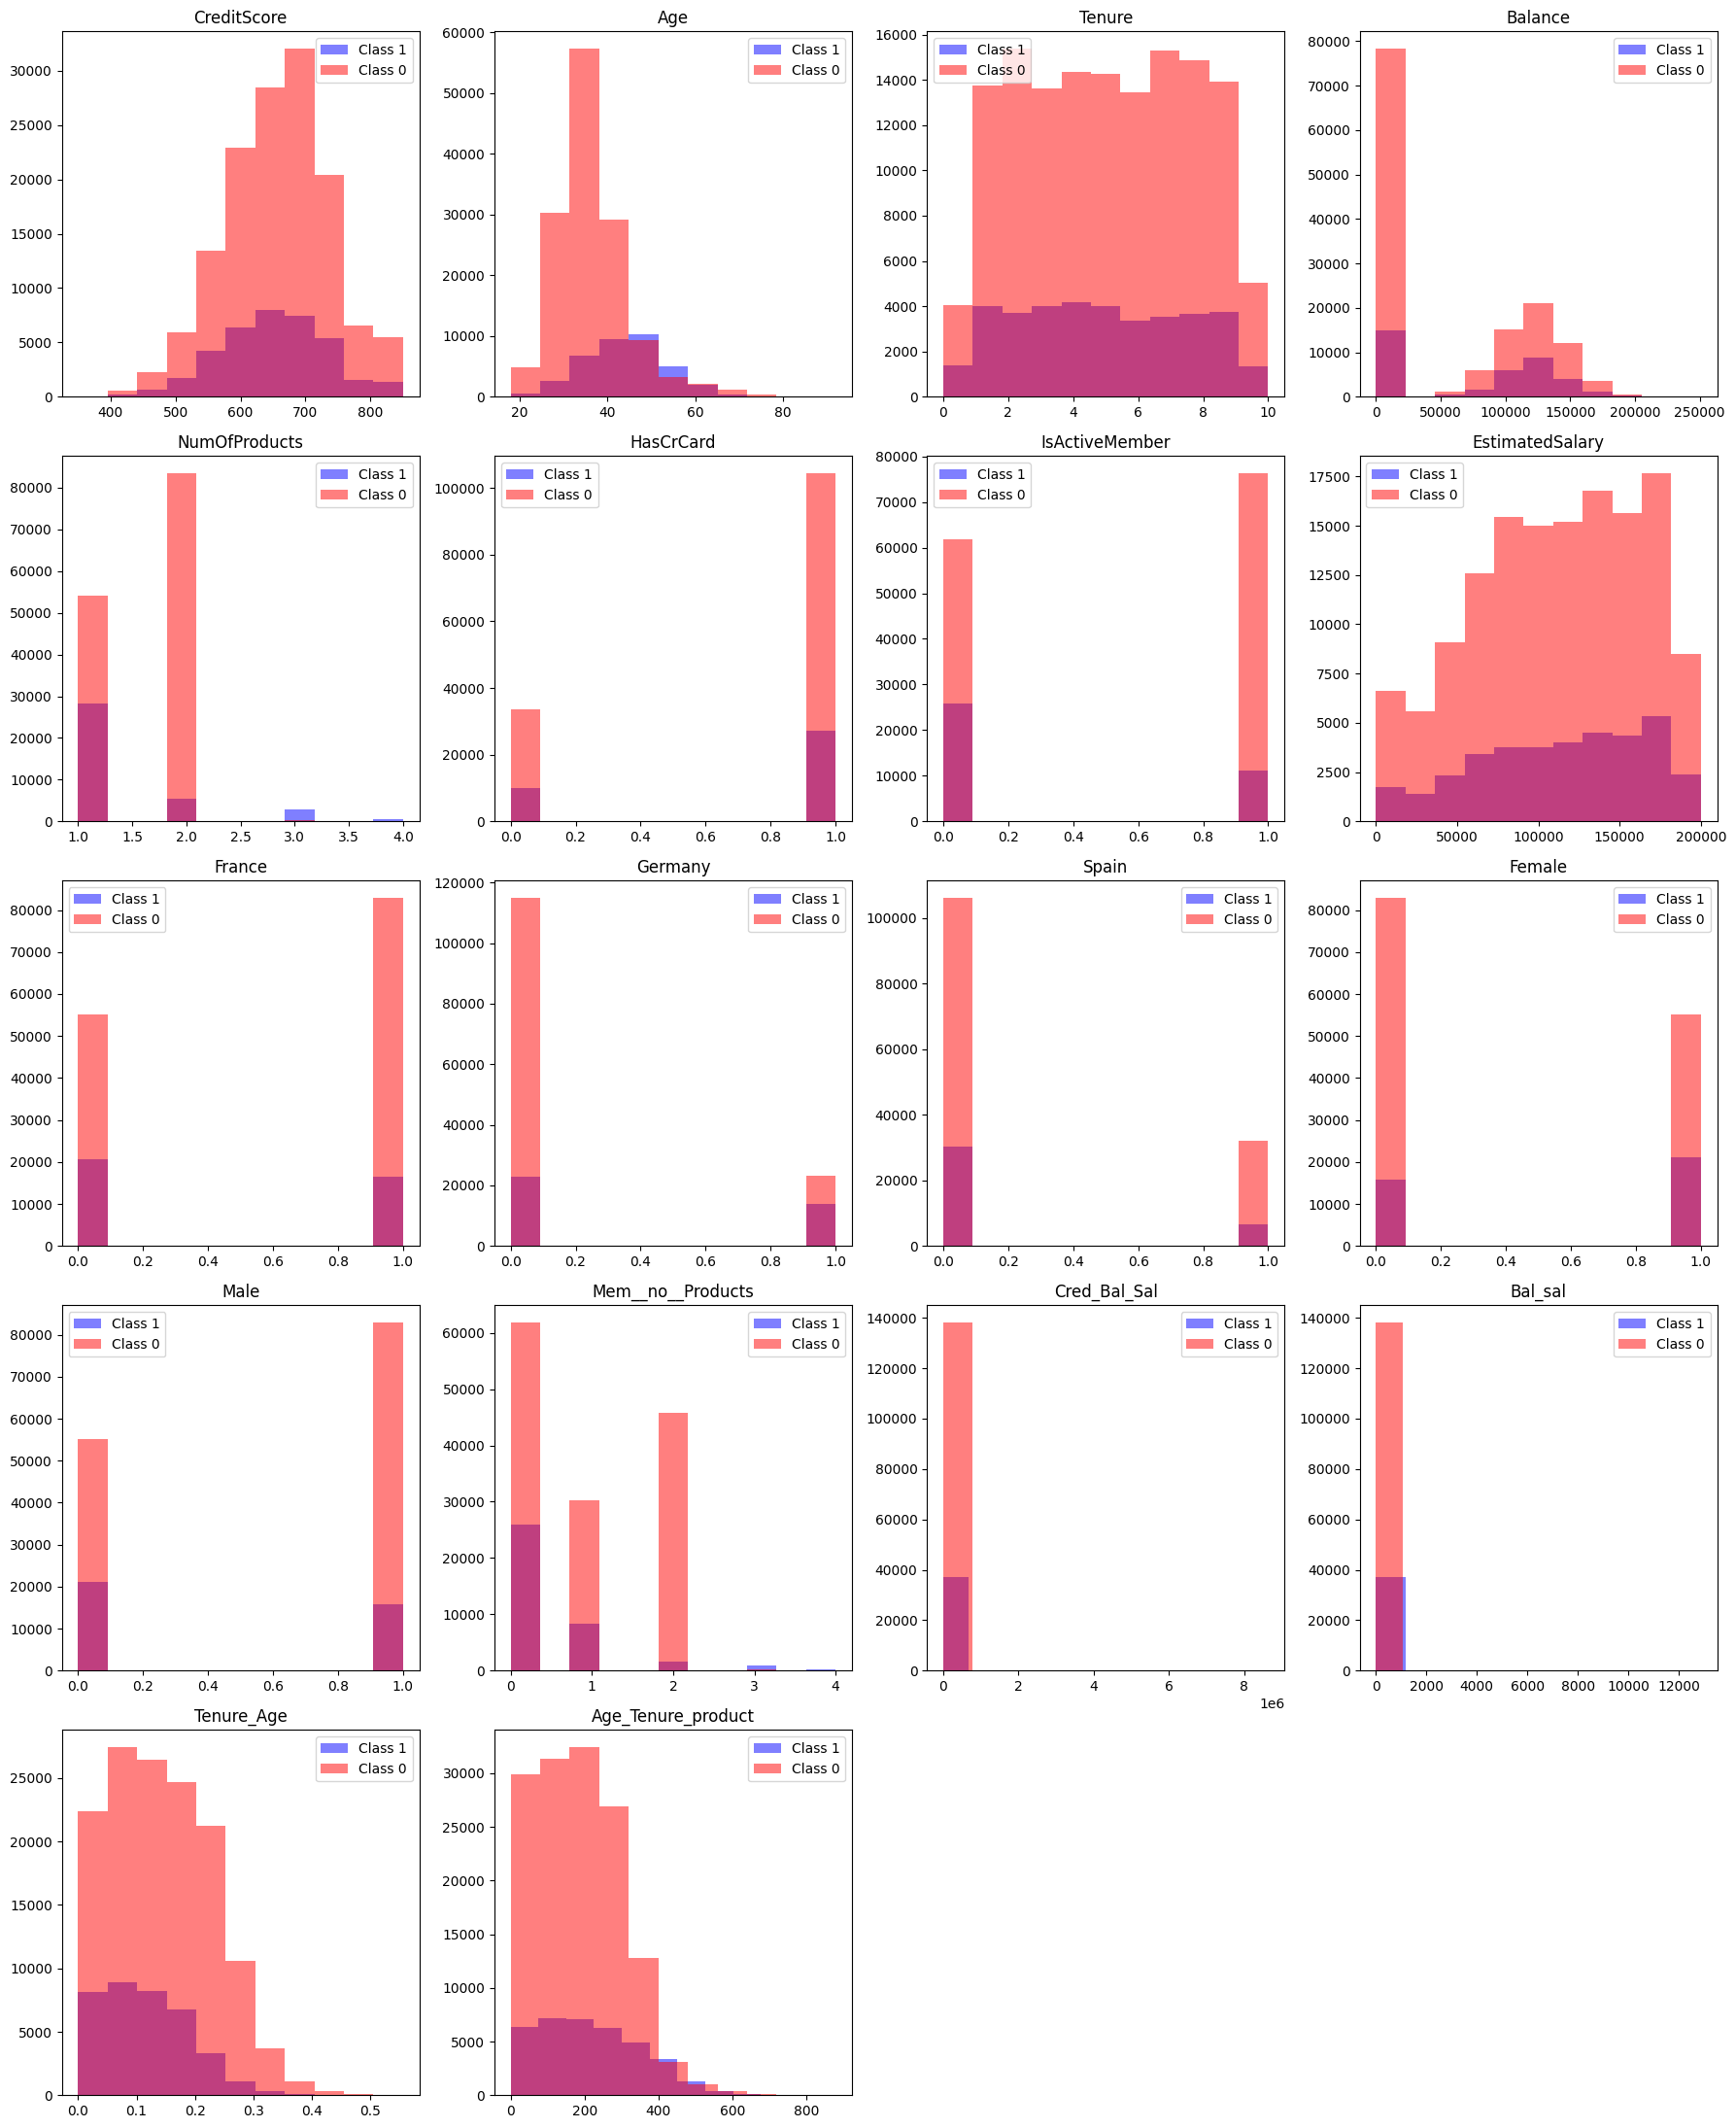

In [136]:
hist_pos_neg(X,Y)

**class 1 = has churned** <br>
**class 0 = has not churned** <br>

This graphs are easy to interpretate, <u>there are more customers who belong to class 0 than 1</u>.<br>
Many of these variables have similar values ​​for both classes, like CreditScore, Tenure, Balance, EstimatedSalary, etc


*   **Age**: In class 1 the clients are older than those in class 0


*   **NumOfProducts**: Here we see something strange with class 1. Most of them only have one product, but class 1 also has 3 and even 4 products. So it can be concluded that those customers who have 3 or more products have a high abandonment rate
*   **IsActiveMemeber**: As expected, those who leave the company are the least active customers.


*   Customers from **Spain** comment less churned
*   There are more **Female** belonging to class 1 than Male<br>

These graphs are interesting to analyze the predictive power of the variables. More separate the 2 distributions are, is better to use to predict because it is easier to discriminate them.







### Correlation Matrix

This matrix is ​​made to verify how correlated the variables are with each other.<br>
If the number is close to one and red, it implies that there is a high positive correlation.<br>
If the number is close to -1 and blue it implies that there is a high weak correlation

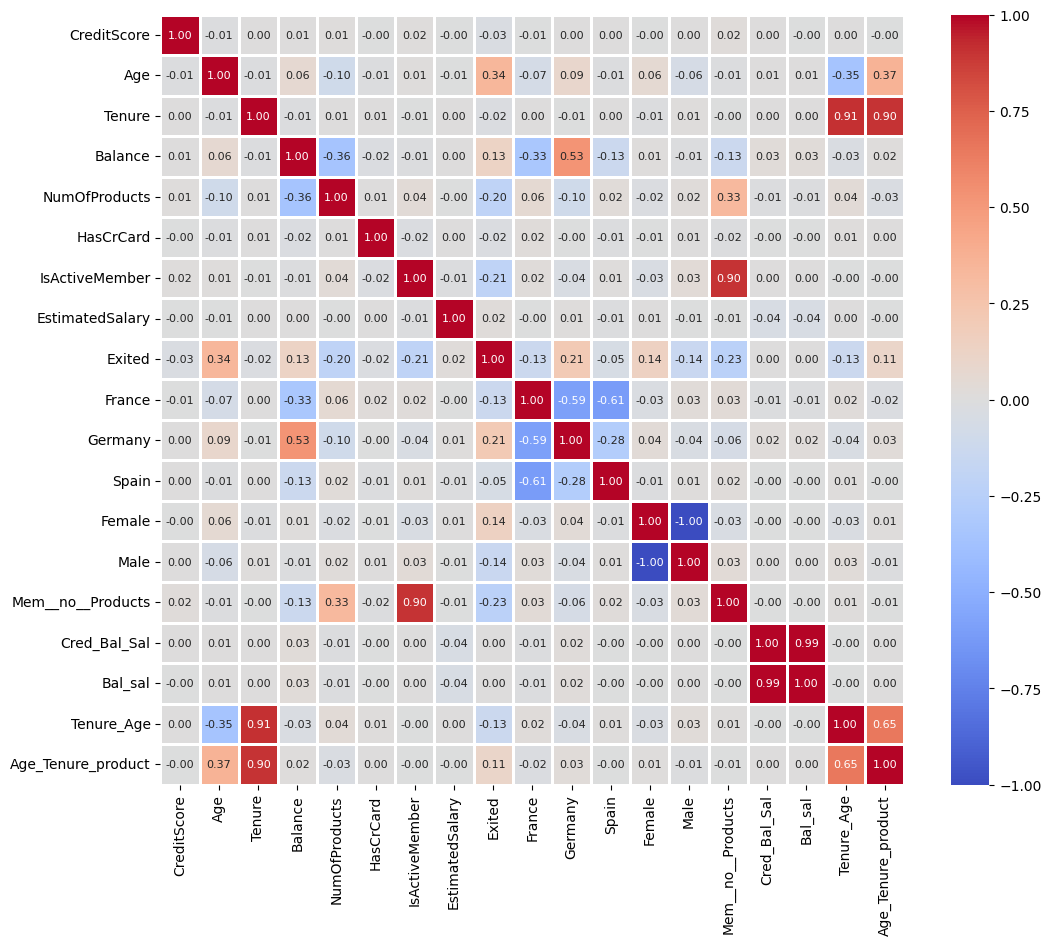

In [137]:
matrix_corr = df.corr(method='pearson')
plt.figure(figsize=(12, 10))
sns.heatmap(matrix_corr, annot=True, annot_kws={'fontsize':8}, fmt='.2f', linewidths=2, cmap='coolwarm')
plt.show()

No strong correlations are observed in general.<br>
the 'NumOfProducts' decreases according to the more balance a person has, which seems incongruous to me. That mean: more products the clients have in the bank, less money they have. Perhaps it is because the client has a pension fund, investment fund or investments in the stock market. Products offered by the bank, which are not reflected in the balance sheet.<br>
There are no worrying results or variables that I would consider eliminating.

## Dataset normalization

There are different functions to standardize data, one of the most common is the one offered by the scikit-learn library: "_StandardScaler_"

In [138]:
scaler = StandardScaler()
X_stand = scaler.fit_transform(X)

## Logistic regression

In [139]:
# First: Division in Test and Train. 20% the size of the Test
X_train, X_test, Y_train, Y_test = train_test_split(X_stand, Y, test_size=0.2, random_state= 3)

# The logistic regression model is applied
regression_model = LogisticRegression()
regression_model.fit(X_train, Y_train)

LogisticRegression()

In [140]:
# Predict the odds on the test set and calculate the ROC AUC metric
y_test_pred = regression_model.predict_proba(X_test)
metrics.roc_auc_score(Y_test, y_test_pred[:, 1])

0.8116205526601377

### Optimizing model parameters

In [141]:
# The metric to optimize will be the ROC AUC

model = LogisticRegression()
param_grid = {'C':[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09],
              'class_weight': ['balanced', None]}
model_GS = GridSearchCV(model,
                        param_grid = param_grid,
                        cv = 5,
                        scoring = 'roc_auc'
                        )

model_GS.fit(X_train, Y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08,
                               0.09],
                         'class_weight': ['balanced', None]},
             scoring='roc_auc')

In [142]:
#The best parameters are shown

print(model_GS.best_params_, '\nROC-AUC: {}'.format(model_GS.best_score_))

{'C': 0.01, 'class_weight': 'balanced'} 
ROC-AUC: 0.8161535603313727


In [143]:
y_test_pred = model_GS.predict_proba(X_test)
metrics.roc_auc_score(Y_test, y_test_pred[:,1])

# Can check that there was a slight improvement when optimizing the parameters, the previous one was 0.811

0.8126458278798625

### Representation of the ROC curve

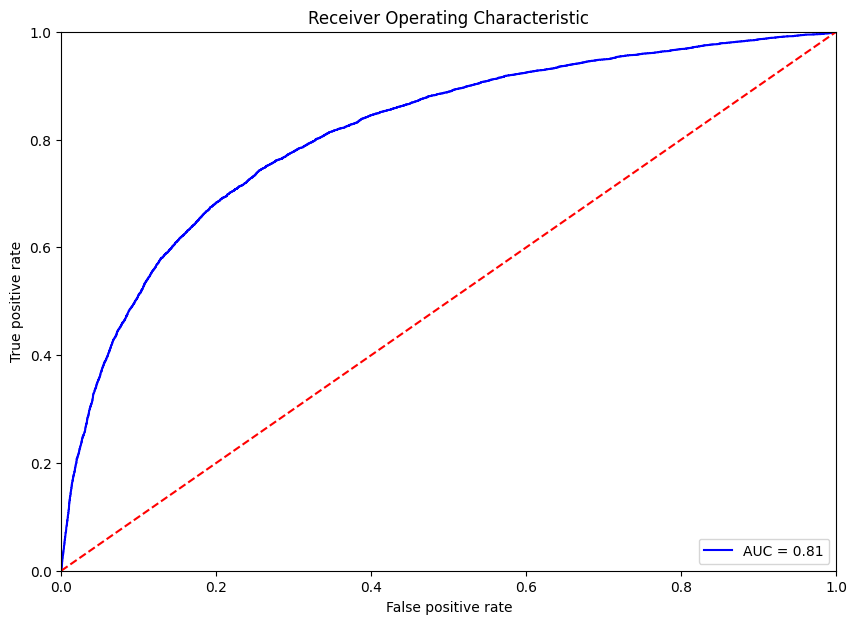

In [144]:
preds = y_test_pred[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.figure(figsize=(10,7))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

### Representation of the probability histograms of the predictions

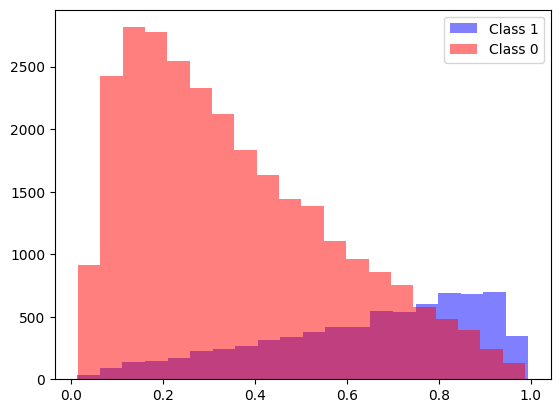

In [145]:
y_test_pred = model_GS.predict_proba(X_test)
y_test_pred_pos = y_test_pred[np.where(Y_test == 1)[0]]
y_test_pred_neg = y_test_pred[np.where(Y_test == 0)[0]]

represent_hist(y_test_pred_pos[:, 1], y_test_pred_neg[:, 1], n_bins=20, density = 0)

### Threshold predictions

Now if the company needs to detect the maximum number of clients that will leave the bank, it does not care about false positives, what matters is the <u>SENSITIVITY</u>. Next, different thresholds will be tested to find out which is the best option to optimize sensitivity.

In [146]:
sensitivity = {}
for umbral in [0.1, 0.2, 0.3, 0.5, 0.6, 0.8]:
  y_umb = 1*(y_test_pred[:, 1] > umbral)
  sensitivity[umbral] = metrics.recall_score(Y_test, y_umb)
sensitivity


{0.1: 0.9863992306635527,
 0.2: 0.9480697898062921,
 0.3: 0.8949031460365435,
 0.5: 0.7337546366259101,
 0.6: 0.6223382332738013,
 0.8: 0.32944085726061273}

If the company needs to reliably detect customers who will leave the bank, it is interested in the <u>PRECISION</u>. Next, different thresholds will be tested to find out which is the best option to optimize precision.

In [147]:
precision = {}
for umbral in [0.1, 0.2, 0.3, 0.5, 0.6, 0.8, 0.9]:
  y_umb = 1*(y_test_pred[:, 1] > umbral)
  precision[umbral] = metrics.precision_score(Y_test, y_umb)
precision

{0.1: 0.22280146465586792,
 0.2: 0.2633366404640159,
 0.3: 0.31365562403698,
 0.5: 0.43518292186099566,
 0.6: 0.5088744102448888,
 0.8: 0.6739741427768409,
 0.9: 0.7615384615384615}

The metrics Accuracy, Sensitivity, Precision and the Confusion Matrix are calculated with the determined threshold.<br>
By default the threshold is usually set to 0.5. In my case I choose 0.6 to improve the Accuracy

In [148]:
umb = 0.6
y_umb = 1*(y_test_pred[:, 1] > umb)

In [149]:
print(u"Confusion Matrix\n", metrics.confusion_matrix(Y_test, y_umb))
print("\nAccuracy\t{}".format(round(metrics.accuracy_score(Y_test, y_umb),2)))
print("Sensitivity\t{}".format(round(metrics.recall_score(Y_test, y_umb),2)))
print("Precision\t{}".format(round(metrics.precision_score(Y_test, y_umb),2)))

Confusion Matrix
 [[23355  4372]
 [ 2749  4530]]

Accuracy	0.8
Sensitivity	0.62
Precision	0.51


## CONCLUSION

In my opinion, good results have been obtained.<br>



*   **True Positive**: 23355 clients of whom I have predicted that they would continue in the bank and they continue.
*   **False Negative**: 2749 clients who I predicted would stay with the bank but have left. <u>Type 2 error</u><br>
This is the worst mistake you can make! The company has not used measures to try to convince them to stay because it was assumed that these customers would not commit churn. THIS TYPE OF ERROR SHOULD TRY TO MINIMIZE IT AS MUCH AS POSSIBLE.

*  **False Positive**: 4372 clients of whom I predicted would leave the company, but in the end they stayed. <u>Type 1 error</u><br>
The algorithm was wrong because those customers did not leave the company, but it is not a bad result because no customers have been lost. When the company is informed that certain clients will churn, the bank can invest resources to try to retain them.
*   **True Negative**: 4530 clients of whom I predicted would leave the company and they leave the entity.





## Another way to show the results

In [150]:
results = pd.DataFrame({
    'Test' : Y_test,
    'Pred' : y_umb
})

#### *True Positive*

In [151]:
results[(results.Test == 0) & (results.Pred == 0)]

,Test,Pred
86648,0,0
39581,0,0
97978,0,0
129725,0,0
146529,0,0
...,...,...
152503,0,0
78537,0,0
58331,0,0
41675,0,0


#### *True Negative*

In [152]:
results[(results.Test == 1) & (results.Pred == 1)]

,Test,Pred
33232,1,1
158857,1,1
40108,1,1
116779,1,1
112144,1,1
...,...,...
138782,1,1
112515,1,1
151267,1,1
127114,1,1


#### *False Negative*

In [153]:
results[(results.Test == 1) & (results.Pred == 0)]

,Test,Pred
31540,1,0
56720,1,0
77635,1,0
86211,1,0
67091,1,0
...,...,...
41181,1,0
49374,1,0
127376,1,0
28591,1,0


#### *False Positive*

In [154]:
results[(results.Test == 0) & (results.Pred == 1)]

,Test,Pred
44775,0,1
132216,0,1
156566,0,1
7512,0,1
100610,0,1
...,...,...
44903,0,1
144160,0,1
93363,0,1
139855,0,1
